# Actividade 1: Espectroscopia de solos

Neste notebook vamos tentar encontrar elementos em amostras de 5 solos, previamente analisadas no LIBS numa média de um total de 10 disparos em diversas zonas da amostra. Na primeira célula carregamos as funções necessárias: 

In [ ]:
#importar as duas bibliotecas já introduzidas no passado
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np

#importar outras bibliotecas necessárias para as funções que vamos definir
import requests
import re


def read_libs_data(filename):
  """
  Função usada para ler dados de ficheiros do LIBS fornecidos.
  Retorna wavelenghts, intensidades
  """
  data = np.loadtxt(filename)
  return data[:,0], data[:,1]/np.max(data[:,1])

def scrap_element(element):
  """
  Função usada para aceder a espectros de elementos da base de dados da NIST.
  Retorna wavelenghts, intensidades normalizadas
  """

  URL = "https://physics.nist.gov/cgi-bin/ASD/lines1.pl?composition="+element+"%3A100&mytext%5B%5D="+element+"&myperc%5B%5D=100&spectra="+element+"0-2&low_w=300&limits_type=0&upp_w=900&show_av=2&unit=1&resolution=2000&temp=1&eden=1e17&maxcharge=2&min_rel_int=0.01&libs=1"
  page = requests.get(URL)

  lista = page.text.split('var dataDopplerArray=')[1].split(';')[0].replace('],',']').replace('null','0').split('\n')[1:]
  
  x = []
  y = []
  for i in lista:
    x.append(float(i.replace('[','').replace(']','').split(",")[0]))
    y.append(float(i.replace('[','').replace(']','').split(",")[1]))

  return x,y/np.max(y)

Estamos agora em condições de avançar. Nas primeiras 2 amostras (soil_1, soil2) sabemos que existem os seguintes elementos:
  
---
> Fe $~~~~~~~~~~~$ P $~~~~~~~~~~~$ W
---

O vosso objectivo é confirmar a presença destes elementos. Para o fazer vamos comparar o espectro obtido do solo com as linhas/zonas mais importantes de cada elemento

(400.0, 450.0)

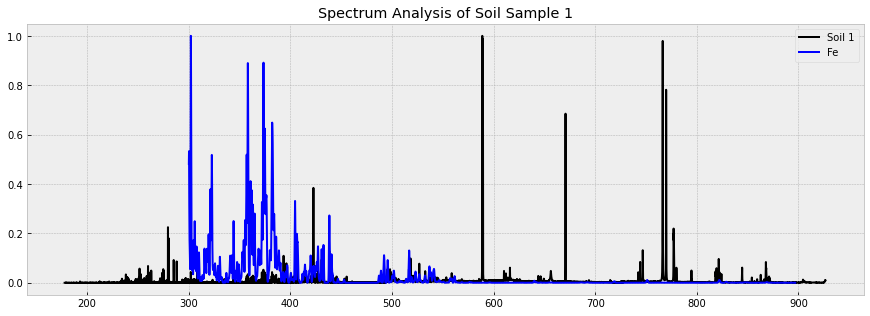

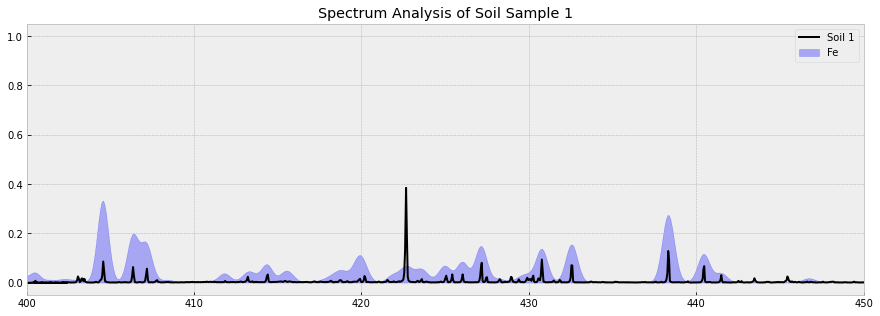

In [ ]:
#ler o ficheiro do solo_1
wavelengths_rock_1, spectrum_rock_1 = read_libs_data('soil_1.txt')

#espectro do Ferro
element = "Fe"
x,y = scrap_element(element)

#plot dos dados
plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Soil Sample 1")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Soil 1')
plt.plot(x,y,label='Fe',color='b')
plt.legend()

#plot dos dados numa regiao mais precisa - 400,450
plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Soil Sample 1")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Soil 1')
plt.fill_between(x,y*0,y,label='Fe',color='b',alpha=0.3)
plt.legend()
plt.xlim(400,450)

Investiguem todas as amostras e concluam se o Ferro está presente em todas elas. Investiguem também a possível presença de Fósforo.

Finalmente investiguem um espectro cada um à procura de outros elementos, encontrando assinatura de pelo menos 3 adicionais. (Pistas: podem também procurar elementos presentes na atmosfera, já que o LIBS não só cria plasma do material mas da atmosfera envolvente; por outro lado, podem também encontrar outro tipo de metais...)